In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
data = pd.read_csv("train_LZdllcl.csv")

In [3]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
data.shape

(54808, 14)

In [5]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

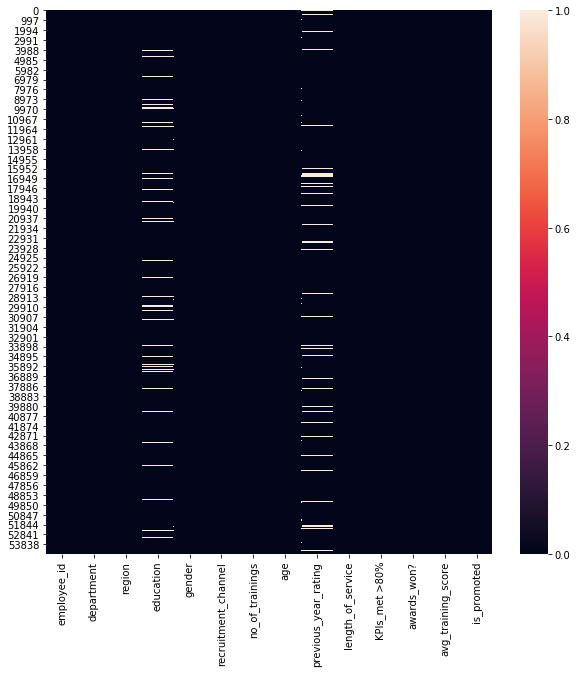

In [6]:
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(data.isnull())

/home/smita/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


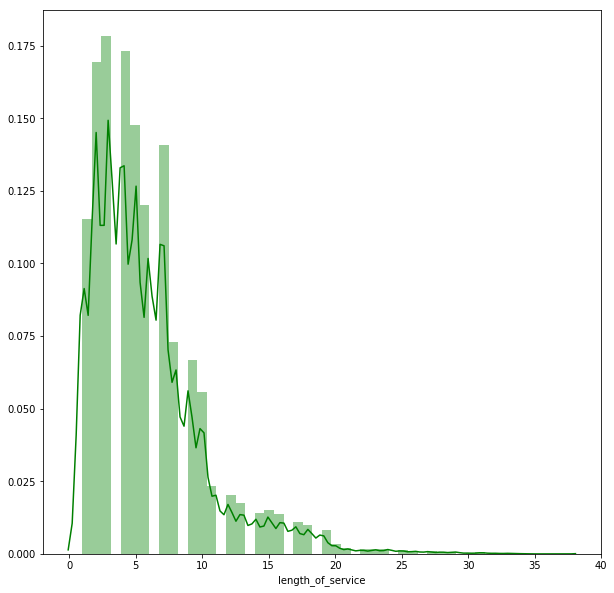

In [7]:
sns.distplot(data['length_of_service'],bins=50,color = 'green')

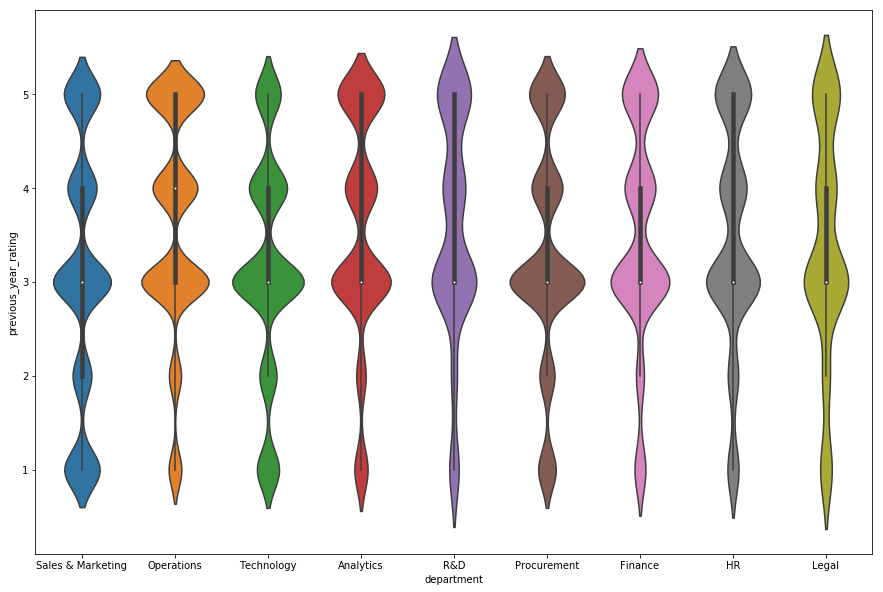

In [8]:
plt.rcParams['figure.figsize']=(15,10)
sns.violinplot(x='department',y='previous_year_rating',data=data)

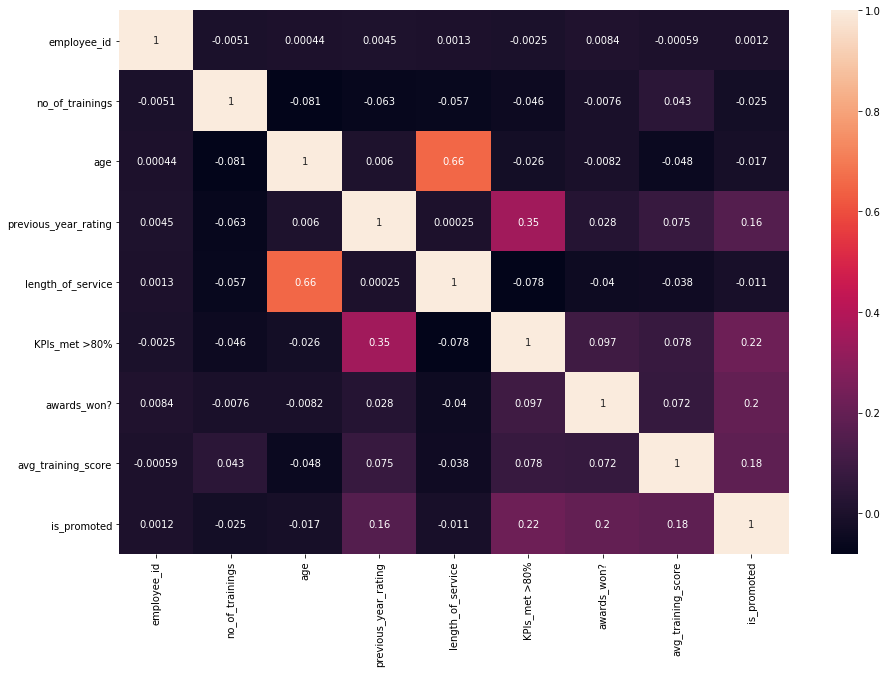

In [9]:
correl = data.corr()
sns.heatmap(correl,annot= True)

In [10]:
data['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [11]:
#Since Masters & above is considered as the Highest qualification assign Masters & above as 1, Bachelors as 2 & Below Secondary as 3

education = {"Master's & above" : 1,"Bachelor's" : 2,"Below Secondary" : 3}
data.replace(education,inplace = True)

In [12]:
#filling the missing values with mean won't work here. So impute the missing values with the median of the education variable

data['education'] = data['education'].fillna(data['education'].median())

In [13]:
#fill the missing values in previous_year_ratings with mean 

data['previous_year_rating'] = data['previous_year_rating'].fillna((data['previous_year_rating'].mean()))

In [14]:
#Now convert all the categorical data to a series of 0 & 1 to make it easier for computation

data = pd.get_dummies(data,columns = ["department","education","recruitment_channel"],prefix =["dep","edu","recruit"])

In [15]:
#Using label encoder change the gender variable

labelenc = LabelEncoder()
data['gender'] = labelenc.fit_transform(data['gender'])

In [16]:
data.isnull().sum()

employee_id              0
region                   0
gender                   0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met >80%            0
awards_won?              0
avg_training_score       0
is_promoted              0
dep_Analytics            0
dep_Finance              0
dep_HR                   0
dep_Legal                0
dep_Operations           0
dep_Procurement          0
dep_R&D                  0
dep_Sales & Marketing    0
dep_Technology           0
edu_1.0                  0
edu_2.0                  0
edu_3.0                  0
recruit_other            0
recruit_referred         0
recruit_sourcing         0
dtype: int64

In [17]:
data.drop(['employee_id','region'],axis= 1,inplace=True)

In [18]:
X = data.drop(['is_promoted'],axis=1)
y = data['is_promoted']

In [19]:
#Separate the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Random Forest 

rdf = RandomForestClassifier(n_estimators=500, bootstrap= True)
rdf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
pred = rdf.predict(X_test)

In [22]:
print(confusion_matrix(y_test, pred))
predictions1 = [value for value in pred]
accuracy = accuracy_score(y_test, predictions1)
precision = precision_score(y_test, predictions1)
recall = recall_score(y_test, predictions1)
f1 = f1_score(y_test, predictions1)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, rdf.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, rdf.predict_proba(X_train)[:,1]))

[[9948  106]
 [ 606  302]]
Accuracy_score: 93.50% on test dataset
precision_score: 74.02% on test dataset
recall_score: 33.26% on test dataset
f1_score: 45.90% on test dataset
roc_auc test set 0.8758498710487596
roc_auc training set 0.9999304387853349


In [23]:
print(accuracy_score(y_test,pred))

0.9350483488414523


In [24]:
#Xgboost Model 

param_test2b = {
  #'min_child_weight':[5,6],
  #'max_depth': range(3,10,2),
  #'n_estimators':[150,200,300,400],
  #'scale_pos_weight':[1,2,3,4],
  #'colsample_bytree':[0.7,0.8], 
  #'subsample':[0.7,0.8],
  #'gamma':[0,0.2.0.4]
    
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=3,seed=27), 
 param_grid = param_test2b, scoring='f1',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(X_train, y_train)
#print(gsearch2b.grid_scores_)
print("gsearch2b.best_params_",gsearch2b.best_params_)
print("gsearch2b.best_score_",gsearch2b.best_score_)

gsearch2b.best_params_ {}
gsearch2b.best_score_ 0.5169096502672469


In [25]:
modelXg = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',scale_pos_weight=3,seed=29)
modelXg.fit(X_train, y_train)
predict1 = modelXg.predict(X_test)

In [26]:
print(confusion_matrix(y_test, predict1))
predictions = [value for value in predict1]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, modelXg.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, modelXg.predict_proba(X_train)[:,1]))

[[9826  228]
 [ 518  390]]
Accuracy_score: 93.19% on test dataset
precision_score: 63.11% on test dataset
recall_score: 42.95% on test dataset
f1_score: 51.11% on test dataset
roc_auc test set 0.9089353066130123
roc_auc training set 0.9259539330864173


In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [28]:
lda = LinearDiscriminantAnalysis(n_components= 3)

In [29]:
X_train1 = lda.fit_transform(X_train,y_train)
X_test2 = lda.transform(X_test)

/home/smita/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [30]:
rdf2 = RandomForestClassifier(n_estimators=500, bootstrap= True)
rdf2.fit(X_train1,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
pred2 = rdf2.predict(X_test2)

In [32]:
print(confusion_matrix(y_test, pred2))
predictions3 = [value for value in pred2]
accuracy = accuracy_score(y_test, predictions3)
precision = precision_score(y_test, predictions3)
recall = recall_score(y_test, predictions3)
f1 = f1_score(y_test, predictions3)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, rdf2.predict_proba(X_test2)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, rdf2.predict_proba(X_train1)[:,1]))

[[9459  595]
 [ 589  319]]
Accuracy_score: 89.20% on test dataset
precision_score: 34.90% on test dataset
recall_score: 35.13% on test dataset
f1_score: 35.02% on test dataset
roc_auc test set 0.7505066254560178
roc_auc training set 0.999859563905688


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors= 15,p =2,metric= 'minkowski')

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [36]:
y_predict = knn.predict(X_test)

In [37]:
print(confusion_matrix(y_test, y_predict))
predictions1 = [value for value in y_predict]
accuracy = accuracy_score(y_test, predictions1)
precision = precision_score(y_test, predictions1)
recall = recall_score(y_test, predictions1)
f1 = f1_score(y_test, predictions1)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, knn.predict_proba(X_train)[:,1]))

[[10043    11]
 [  800   108]]
Accuracy_score: 92.60% on test dataset
precision_score: 90.76% on test dataset
recall_score: 11.89% on test dataset
f1_score: 21.03% on test dataset
roc_auc test set 0.745823653592188
roc_auc training set 0.8880866774732197


In [38]:
from sklearn.svm import SVC

In [39]:
svm = SVC()

In [41]:
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01]}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

/home/smita/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 2.3min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total= 2.3min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 2.3min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.0min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.0min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.3min
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=  18.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=  26.8s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

In [ ]:
grid_pred= grid.predict(X_test)

In [ ]:
svm.fit(X_train,y_train)

In [ ]:
pred = svm.predict(X_test)

In [40]:
print(confusion_matrix(y_test, pred))
predictions1 = [value for value in pred]
accuracy = accuracy_score(y_test, predictions1)
precision = precision_score(y_test, predictions1)
recall = recall_score(y_test, predictions1)
f1 = f1_score(y_test, predictions1)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))


[[9948  106]
 [ 606  302]]
Accuracy_score: 93.50% on test dataset
precision_score: 74.02% on test dataset
recall_score: 33.26% on test dataset
f1_score: 45.90% on test dataset


In [ ]:
print(confusion_matrix(y_test, grid_pred))
predictions1 = [value for value in grid_pred]
accuracy = accuracy_score(y_test, predictions1)
precision = precision_score(y_test, predictions1)
recall = recall_score(y_test, predictions1)
f1 = f1_score(y_test, predictions1)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
